In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load the data
data = pd.read_csv("adult.csv")

# Separate the target variable from the features
X = data.drop("income", axis=1)
y = data["income"]

#Encoding 
lb = LabelEncoder()
y = lb.fit_transform(y)

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the deep learning model
model = Sequential()
model.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Evaluate the model on test data with Adam optimizer
y_pred_adam = np.round(model.predict(X_test))
accuracy_adam = accuracy_score(y_test, y_pred_adam)
precision_adam = precision_score(y_test, y_pred_adam)
recall_adam = recall_score(y_test, y_pred_adam)
f1_adam = f1_score(y_test, y_pred_adam)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
275/275 [==============================] - 3s 5ms/step - loss: 0.4657 - accuracy: 0.7873 - val_loss: 0.3596 - val_accuracy: 0.8263
Epoch 2/20
275/275 [==============================] - 1s 3ms/step - loss: 0.3816 - accuracy: 0.8220 - val_loss: 0.3468 - val_accuracy: 0.8339
Epoch 3/20
275/275 [==============================] - 1s 3ms/step - loss: 0.3646 - accuracy: 0.8339 - val_loss: 0.3427 - val_accuracy: 0.8357
Epoch 4/20
275/275 [==============================] - 1s 3ms/step - loss: 0.3526 - accuracy: 0.8386 - val_loss: 0.3366 - val_accuracy: 0.8385
Epoch 5/20
275/275 [==============================] - 1s 3ms/step - loss: 0.3481 - accuracy: 0.8397 - val_loss: 0.3340 - val_accuracy: 0.8367
Epoch 6/20
275/275 [==============================] - 1s 4ms/step - loss: 0.3404 - accuracy: 0.8439 - val_loss: 0.3309 - val_accuracy: 0.8403
Epoch 7/20
275/275 [==============================] - 2s 6ms/step - loss: 0.3359 - accuracy: 0.8479 - val_loss: 0.3272 - val_accuracy: 0.8429
Epoch 

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6976      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


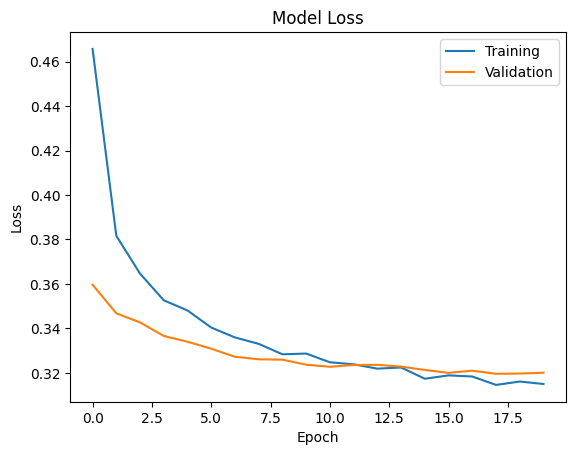

In [4]:
import matplotlib.pyplot as plt
# Plot the training and validation loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc="upper right")
plt.show()


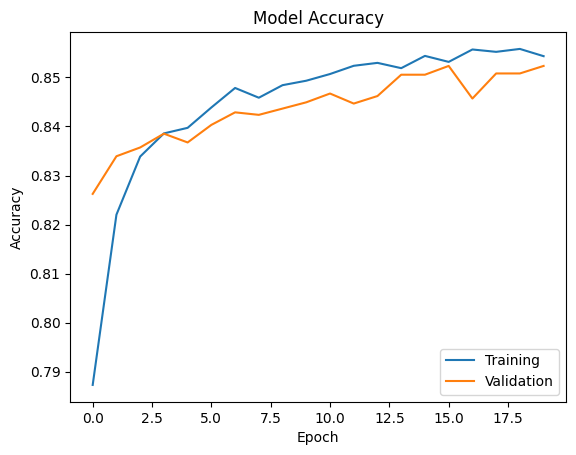

In [5]:
# Plot the training and validation accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc="lower right")
plt.show()

# with **SGD**

In [6]:
from keras.optimizers.legacy.gradient_descent import SGD
# Define the deep learning model
model2 = Sequential()
model2.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation="sigmoid"))

# Compile the model
optimizer = SGD(lr=0.001)
model2.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history2 = model2.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model2.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Evaluate the model on test data with SGD optimizer
y_pred_sgd = np.round(model2.predict(X_test))
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd)
recall_sgd = recall_score(y_test, y_pred_sgd)
f1_sgd = f1_score(y_test, y_pred_sgd)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


275/275 [==============================] - 1s 3ms/step - loss: 0.6764 - accuracy: 0.6962 - val_loss: 0.5821 - val_accuracy: 0.7459
Epoch 2/20
275/275 [==============================] - 1s 3ms/step - loss: 0.6495 - accuracy: 0.7102 - val_loss: 0.5639 - val_accuracy: 0.7510
Epoch 3/20
275/275 [==============================] - 1s 3ms/step - loss: 0.6234 - accuracy: 0.7200 - val_loss: 0.5499 - val_accuracy: 0.7546
Epoch 4/20
275/275 [==============================] - 1s 4ms/step - loss: 0.6044 - accuracy: 0.7304 - val_loss: 0.5388 - val_accuracy: 0.7569
Epoch 5/20
275/275 [==============================] - 1s 4ms/step - loss: 0.5960 - accuracy: 0.7363 - val_loss: 0.5294 - val_accuracy: 0.7605
Epoch 6/20
275/275 [==============================] - 1s 4ms/step - loss: 0.5806 - accuracy: 0.7442 - val_loss: 0.5213 - val_accuracy: 0.7615
Epoch 7/20
275/275 [==============================] - 1s 2ms/step - loss: 0.5743 - accuracy: 0.7437 - val_loss: 0.5144 - val_accuracy: 0.7620
Epoch 8/20
275/27

In [7]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                6976      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


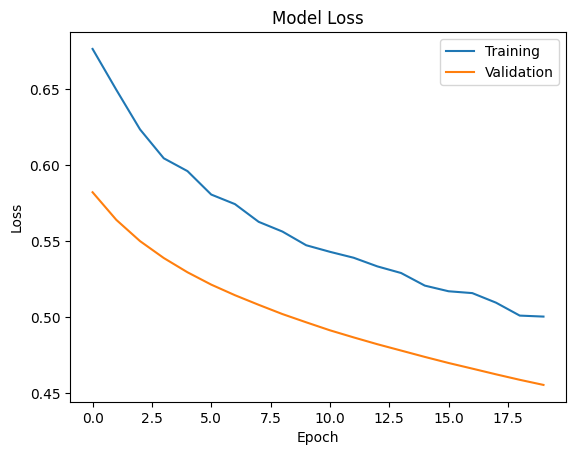

In [8]:
import matplotlib.pyplot as plt
# Plot the training and validation loss
plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc="upper right")
plt.show()


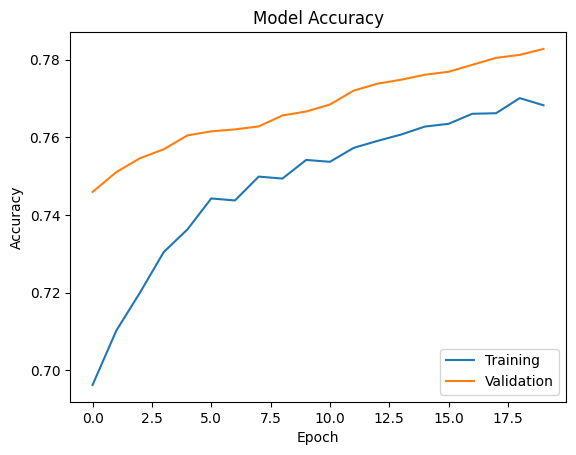

In [9]:
# Plot the training and validation accuracy
plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc="lower right")
plt.show()

In [10]:
# Print the results
print("Evaluation Metrics with SGD optimizer:")
print("Accuracy: {:.3f}".format(accuracy_sgd))
print("Precision: {:.3f}".format(precision_sgd))
print("Recall: {:.3f}".format(recall_sgd))
print("F1-Score: {:.3f}".format(f1_sgd))

print("Evaluation Metrics with Adam optimizer:")
print("Accuracy: {:.3f}".format(accuracy_adam))
print("Precision: {:.3f}".format(precision_adam))
print("Recall: {:.3f}".format(recall_adam))
print("F1-Score: {:.3f}".format(f1_adam))

Evaluation Metrics with SGD optimizer:
Accuracy: 0.795
Precision: 0.771
Recall: 0.177
F1-Score: 0.288
Evaluation Metrics with Adam optimizer:
Accuracy: 0.860
Precision: 0.759
Recall: 0.594
F1-Score: 0.666


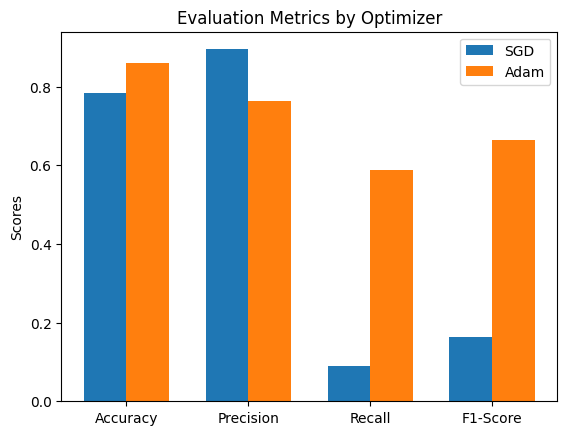

In [11]:


# Define the evaluation metrics
sgd_acc = 0.784
sgd_prec = 0.895
sgd_recall = 0.090
sgd_f1 = 0.163

adam_acc = 0.861
adam_prec = 0.763
adam_recall = 0.588
adam_f1 = 0.664

# Create a bar chart of the evaluation metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
sgd_scores = [sgd_acc, sgd_prec, sgd_recall, sgd_f1]
adam_scores = [adam_acc, adam_prec, adam_recall, adam_f1]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sgd_scores, width, label='SGD')
rects2 = ax.bar(x + width/2, adam_scores, width, label='Adam')

ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics by Optimizer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


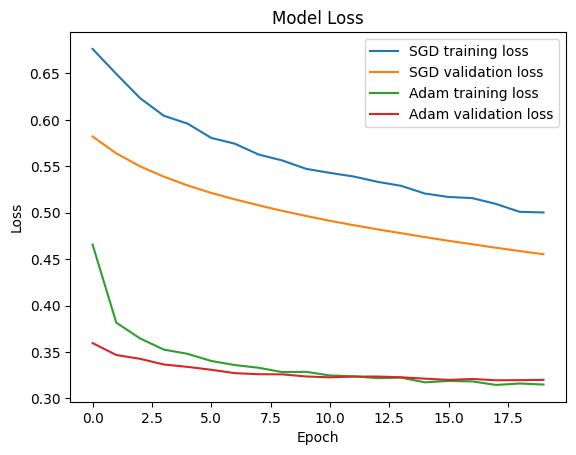

In [12]:
# Plot the training and validation loss for both optimizers
#plt.figure(figsize=(7,4))
plt.plot(history2.history['loss'], label='SGD training loss')
plt.plot(history2.history['val_loss'], label='SGD validation loss')
plt.plot(history.history['loss'], label='Adam training loss')
plt.plot(history.history['val_loss'], label='Adam validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



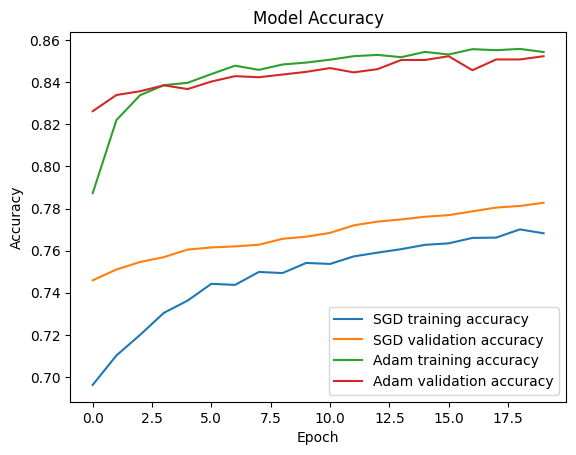

In [13]:
# Plot the training and validation accuracy for both optimizers
#plt.figure(figsize=(8, 8))
plt.plot(history2.history['accuracy'], label='SGD training accuracy')
plt.plot(history2.history['val_accuracy'], label='SGD validation accuracy')
plt.plot(history.history['accuracy'], label='Adam training accuracy')
plt.plot(history.history['val_accuracy'], label='Adam validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from scipy.stats import uniform

# Define a function to create the model
def create_model(dropout_rate=0.5, optimizer=Adam(learning_rate=0.001)):
    model = Sequential()
    model.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Create a KerasClassifier object
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameters to tune
param_dist = {
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30],
    'optimizer': [Adam(learning_rate=0.001), Adam(learning_rate=0.01)],
    'dropout_rate': uniform(0, 1)
}

# Use RandomizedSearchCV to search for the best hyperparameters
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, verbose=2)
random_search_result = random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Parameters: ", random_search_result.best_params_)
print("Best Accuracy: ", random_search_result.best_score_)


<ipython-input-18-669883a8fddd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END batch_size=32, dropout_rate=0.6950459055597771, epochs=10, optimizer=<keras.optimizers.legacy.adam.Adam object at 0x7fe57ce9e1a0>; total time=  22.8s
[CV] END batch_size=32, dropout_rate=0.6950459055597771, epochs=10, optimizer=<keras.optimizers.legacy.adam.Adam object at 0x7fe57ce9e1a0>; total time=  15.6s
[CV] END batch_size=32, dropout_rate=0.6950459055597771, epochs=10, optimizer=<keras.optimizers.legacy.adam.Adam object at 0x7fe57ce9e1a0>; total time=  21.8s
[CV] END batch_size=64, dropout_rate=0.7118531852206623, epochs=20, optimizer=<keras.optimizers.legacy.adam.Adam object at 0x7fe57ce9ecb0>; total time=  21.7s
[CV] END batch_size=64, dropout_rate=0.7118531852206623, epochs=20, optimizer=<keras.optimizers.legacy.adam.Adam object at 0x7fe57ce9ecb0>; total time=  17.0s
[CV] END batch_size=64, dropout_rate=0.7118531852206623, epochs=20, optimizer=<keras.optimizers.legacy.adam.Adam object at 0x7fe57ce9ecb0>; tota

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Epoch 1/10


<ipython-input-22-e4a7052212f9>:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


Streaming output truncated to the last 5000 lines.
815/815 [==============================] - 2s 3ms/step - loss: 0.3549 - accuracy: 0.8306
Epoch 18/20
815/815 [==============================] - 2s 3ms/step - loss: 0.3684 - accuracy: 0.8335
Epoch 19/20
815/815 [==============================] - 2s 3ms/step - loss: 0.3857 - accuracy: 0.8270
Epoch 20/20
407/407 [==============================] - 1s 2ms/step - loss: 0.3416 - accuracy: 0.8499
[CV] END batch_size=32, dropout_rate=0.5, epochs=20, optimizer=<keras.optimizers.legacy.adam.Adam object at 0x7fe585905c90>; total time=  48.1s
Epoch 1/20
815/815 [==============================] - 3s 2ms/step - loss: 0.3946 - accuracy: 0.8145
Epoch 2/20
815/815 [==============================] - 2s 2ms/step - loss: 0.3766 - accuracy: 0.8250
Epoch 3/20
815/815 [==============================] - 2s 3ms/step - loss: 0.3668 - accuracy: 0.8309
Epoch 4/20
815/815 [==============================] - 3s 3ms/step - loss: 0.3752 - accuracy: 0.8281
Epoch 5/20
81

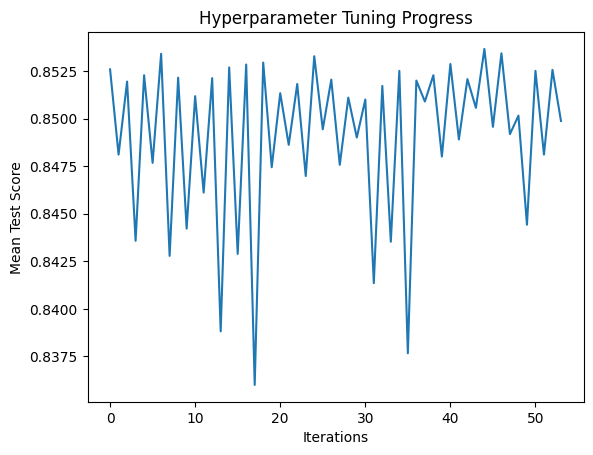

Best Parameters:  {'batch_size': 128, 'dropout_rate': 0.3, 'epochs': 20, 'optimizer': <keras.optimizers.legacy.adam.Adam object at 0x7fe585905990>}
Best Accuracy:  0.8536585569381714


In [22]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from scipy.stats import uniform
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt

# Define a function to create the model
def create_model(dropout_rate=0.5, optimizer=Adam(learning_rate=0.001)):
    model = Sequential()
    model.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Create a KerasClassifier object
model = KerasClassifier(build_fn=create_model)

# Define the hyperparameters to tune
param_dist = {
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30],
    'optimizer': [Adam(learning_rate=0.001), Adam(learning_rate=0.01)],
    'dropout_rate': [0.2, 0.3, 0.5]
}

# Use RandomizedSearchCV to search for the best hyperparameters
random_search = GridSearchCV(estimator=model, param_grid=param_dist , cv=3, verbose=2)
random_search_result = random_search.fit(X_train, y_train)

# Visualize the hyperparameter tuning progress
plt.plot(random_search_result.cv_results_['mean_test_score'])
plt.title('Hyperparameter Tuning Progress')
plt.xlabel('Iterations')
plt.ylabel('Mean Test Score')
plt.show()

# Print the best hyperparameters and the corresponding accuracy
print("Best Parameters: ", random_search_result.best_params_)
print("Best Accuracy: ", random_search_result.best_score_)
